<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Target-Identification" data-toc-modified-id="Target-Identification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target Identification</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Representation" data-toc-modified-id="Data-Representation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Representation</a></span></li><li><span><a href="#Attribute-Semantics" data-toc-modified-id="Attribute-Semantics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Attribute Semantics</a></span><ul class="toc-item"><li><span><a href="#All-columns" data-toc-modified-id="All-columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>All columns</a></span></li><li><span><a href="#Remove-ones-with-max-Missing" data-toc-modified-id="Remove-ones-with-max-Missing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Remove ones with max Missing</a></span></li><li><span><a href="#Fix-work-pos-column" data-toc-modified-id="Fix-work-pos-column-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fix work pos column</a></span></li><li><span><a href="#Identify-categorical" data-toc-modified-id="Identify-categorical-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Identify categorical</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Questions" data-toc-modified-id="Questions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#PLOTS" data-toc-modified-id="PLOTS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PLOTS</a></span><ul class="toc-item"><li><span><a href="#Age-related" data-toc-modified-id="Age-related-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Age related</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Country-related" data-toc-modified-id="Country-related-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Country related</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#No-of-employees-in-companies-of-people-who-have-a-disorder" data-toc-modified-id="No-of-employees-in-companies-of-people-who-have-a-disorder-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>No of employees in companies of people who have a disorder</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Disorder-related-to-how-open-the-person-can-be-with-friends-and-family" data-toc-modified-id="Disorder-related-to-how-open-the-person-can-be-with-friends-and-family-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Disorder related to how open the person can be with friends and family</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.4.1"><span class="toc-item-num">7.4.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Remote-Work" data-toc-modified-id="Remote-Work-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Remote Work</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.5.1"><span class="toc-item-num">7.5.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Comfortable-discussing-with-coworkers" data-toc-modified-id="Comfortable-discussing-with-coworkers-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Comfortable discussing with coworkers</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.6.1"><span class="toc-item-num">7.6.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Comfortable-with-employees" data-toc-modified-id="Comfortable-with-employees-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Comfortable with employees</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.7.1"><span class="toc-item-num">7.7.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Self-employment" data-toc-modified-id="Self-employment-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Self employment</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.8.1"><span class="toc-item-num">7.8.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Interference-with-work" data-toc-modified-id="Interference-with-work-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span>Interference with work</a></span><ul class="toc-item"><li><span><a href="#Infer" data-toc-modified-id="Infer-7.9.1"><span class="toc-item-num">7.9.1&nbsp;&nbsp;</span>Infer</a></span></li></ul></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.10"><span class="toc-item-num">7.10&nbsp;&nbsp;</span>Prediction</a></span></li></ul></li></ul></div>

# Introduction
## Data Collection
   - This project is based on the OSMI dataset 
   - It was a survey conducted on mental health of people working in tech
   - Link https://www.kaggle.com/osmi/mental-health-in-tech-2016#mental-heath-in-tech-2016_20161114.csv
   

## Target Identification 
- This project aims to understand and identify patterns from the dataset by performing EDA on it
- main_column = data['Do you currently have a mental health disorder?'] 

# Imports

In [1]:
# import sklearn as skl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set(style="ticks")

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.shape

(1433, 63)

# Data Representation

In [4]:
data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


# Attribute Semantics

In [5]:
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## All columns 

In [6]:
oldCols = data.columns
[print(x) for x in oldCols]

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Remove ones with max Missing

In [7]:
toRemove = []

In [8]:
counter = 0
for a in oldCols:
    counter += 1
    calc = round((data[a].isna().sum() / len(data[a])) * 100, 2)
    print(f'{calc}% - Colno: {counter}')
    if calc > 50:
        #         print(counter)
        toRemove.append(a)

0.0% - Colno: 1
20.03% - Colno: 2
20.03% - Colno: 3
81.65% - Colno: 4
20.03% - Colno: 5
29.31% - Colno: 6
20.03% - Colno: 7
20.03% - Colno: 8
20.03% - Colno: 9
20.03% - Colno: 10
20.03% - Colno: 11
20.03% - Colno: 12
20.03% - Colno: 13
20.03% - Colno: 14
20.03% - Colno: 15
20.03% - Colno: 16
79.97% - Colno: 17
79.97% - Colno: 18
79.97% - Colno: 19
89.95% - Colno: 20
79.97% - Colno: 21
79.97% - Colno: 22
79.97% - Colno: 23
85.76% - Colno: 24
0.0% - Colno: 25
11.79% - Colno: 26
11.79% - Colno: 27
11.79% - Colno: 28
11.79% - Colno: 29
11.79% - Colno: 30
11.79% - Colno: 31
11.79% - Colno: 32
11.79% - Colno: 33
11.79% - Colno: 34
11.79% - Colno: 35
11.79% - Colno: 36
0.0% - Colno: 37
23.59% - Colno: 38
0.0% - Colno: 39
21.42% - Colno: 40
0.0% - Colno: 41
0.0% - Colno: 42
0.0% - Colno: 43
6.21% - Colno: 44
54.15% - Colno: 45
0.0% - Colno: 46
0.0% - Colno: 47
0.0% - Colno: 48
60.36% - Colno: 49
77.53% - Colno: 50
0.0% - Colno: 51
50.38% - Colno: 52
0.0% - Colno: 53
0.0% - Colno: 54
0.0% - Col

In [9]:
data = data.drop(toRemove, axis=1)
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## Fix work pos column

In [10]:
actual_cat = []
for a in data[
        'Which of the following best describes your work position?'].str.split(
            '|'):
    for b in a:
        if b not in actual_cat:
            actual_cat.append(b)

d = {actual_cat[a]: a + 1 for a in range(len(actual_cat))}
d

{'Back-end Developer': 1,
 'Front-end Developer': 2,
 'Supervisor/Team Lead': 3,
 'Executive Leadership': 4,
 'Dev Evangelist/Advocate': 5,
 'DevOps/SysAdmin': 6,
 'Support': 7,
 'Designer': 8,
 'One-person shop': 9,
 'Other': 10,
 'Sales': 11,
 'HR': 12}

In [11]:
def fixer(x):
    x = x.split('|')
    temp = [d[a] for a in x]
    #     print(temp)
    return sum(temp)

In [12]:
fixer("Back-end Developer|Front-end Developer")

3

In [13]:
data['Which of the following best describes your work position?'] = data[
    'Which of the following best describes your work position?'].apply(fixer)

## Identify categorical

In [14]:
cat_columns = [x for x in data.columns if data[x].dtypes == object]
cat_columns

['How many employees does your company or organization have?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Do you think that discussing a physical health issue with your employer would have negative consequences?',
 'Would you feel com

In [15]:
data = data.fillna(0)

In [16]:
data[cat_columns[0]].unique()

array(['26-100', '6-25', 0, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

In [17]:
# for a in cat_columns:
#     data[a] = data[a].astype('category').cat.codes

In [18]:
pd.set_option('display.max_columns', 100)

In [19]:
data.head(3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory

# EDA 
- The objective is to identify the factors affecting the person having mental health disorders and eventually predict the probability of them having one based on the above factors

# Questions

- 1 Which factors primarily affect mental health in employees?
- 2 Should remote work be promoted?
- 3 Do the employees need to be more comfortable with the environment?
- 4 Optimal organization size for people who already have a mental health disorder
- 5 Which is the most suitable location for an employee? 
- 6 What is the optimal age range for working employees?
- 7 Which employees need more support in terms of mental health?
- 8 Which branches require more team building exercises?
- 9 Does self employment affect mental health?
- 10 Does mental health affect the productivity of your company?

# PLOTS

- main_column = data['Do you currently have a mental health disorder?'] 

In [21]:
import plotly.express as px

## Age related

In [22]:
# data['Do you currently have a mental health disorder?'].astype('category').cat.categories
data['Do you currently have a mental health disorder?'] = data[
    'Do you currently have a mental health disorder?'].astype(
        'category').cat.codes

In [133]:
age = px.violin(data,
                x=data['Do you currently have a mental health disorder?'],
                y=data['What is your age?'])
age.show()

In [151]:
plotly.io.write_html(age, 'age.html')

### Infer
- 1 - no, 2 - yes, 0 - maybe
- We can see that mental health disorders start majorly around 20 years of age and progressively get worse till around 50
- There is a huge number of people who are unsure or unwilling to admit that they have a mental health disorder. People between the ages of 20 to 40
- The total number of people who say that they have a disorder or might have one are much more than those that say they dont

## Country related

In [24]:
data['What country do you live in?'].unique()

array(['United Kingdom', 'United States of America', 'Canada', 'Germany',
       'Netherlands', 'Czech Republic', 'Lithuania', 'Australia',
       'France', 'Venezuela', 'Poland', 'Belgium', 'Brazil', 'Denmark',
       'Sweden', 'Russia', 'Spain', 'India', 'Mexico', 'Switzerland',
       'Norway', 'Argentina', 'Ireland', 'Italy', 'Finland', 'Colombia',
       'Costa Rica', 'Vietnam', 'Bulgaria', 'New Zealand', 'South Africa',
       'Slovakia', 'Austria', 'Bangladesh', 'Algeria', 'Pakistan',
       'Afghanistan', 'Greece', 'Romania', 'Other', 'Brunei', 'Japan',
       'Iran', 'Hungary', 'Israel', 'Ecuador', 'Bosnia and Herzegovina',
       'China', 'Chile', 'Guatemala', 'Taiwan', 'Serbia', 'Estonia'],
      dtype=object)

In [25]:
temp_country = data[[
    'What country do you live in?',
    'Do you currently have a mental health disorder?'
]]
temp_country.head(2)

,What country do you live in?,Do you currently have a mental health disorder?
0,United Kingdom,1
1,United States of America,2


In [26]:
len(data[(data['What country do you live in?'] == 'United Kingdom')
         & (data['Do you currently have a mental health disorder?'] != 1)]
    ['Do you currently have a mental health disorder?'])

110

In [27]:
country_n, country_count = [], []
for a in data['What country do you live in?'].unique():
    country_n.append(a)
    country_count.append(
        len(data[(data['What country do you live in?'] == a) & (
            data['Do you currently have a mental health disorder?'] != 1)]
            ['Do you currently have a mental health disorder?']))

In [28]:
country_n[:3], country_count[:3]

(['United Kingdom', 'United States of America', 'Canada'], [110, 572, 41])

In [134]:
coun = px.bar(data, country_n, country_count)
coun.show()

In [152]:
plotly.io.write_html(coun, 'coun.html')

### Infer
- We can clearly see countries like UK, USA, Canada, Netherlands, Germany and Australia have the highest number of people who claim to have a mental disorder
- The US far outweighs any other country

## No of employees in companies of people who have a disorder

In [30]:
data['How many employees does your company or organization have?']

0        26-100
1          6-25
2          6-25
3             0
4          6-25
         ...   
1428          0
1429          0
1430    100-500
1431    100-500
1432    100-500
Name: How many employees does your company or organization have?, Length: 1433, dtype: object

In [31]:
data_dis = data[data['Do you currently have a mental health disorder?'] != 1][[
    'How many employees does your company or organization have?',
    'Do you currently have a mental health disorder?'
]]

In [32]:
data_dis.head(2)

,How many employees does your company or organization have?,Do you currently have a mental health disorder?
1,6-25,2
3,0,2


In [33]:
new_dis = data_dis.groupby(
    by='How many employees does your company or organization have?').count(
    ).reset_index()

In [34]:
new_dis.head(2)

,How many employees does your company or organization have?,Do you currently have a mental health disorder?
0,0,197
1,1-5,33


In [153]:
fig = px.pie(
    data,
    values=new_dis['Do you currently have a mental health disorder?'],
    names=new_dis['How many employees does your company or organization have?']
)
fig.show()

In [154]:
plotly.io.write_html(fig, 'empplo.html')

### Infer
- Very few people are present in the bracket of a mid sized company
- A majority of people are present in the bracket of extremely large as well as very small companies
- The most number of people are present in the bracket of very small companies

## Disorder related to how open the person can be with friends and family

In [36]:
family_temp = data[[
    'Do you currently have a mental health disorder?',
    'How willing would you be to share with friends and family that you have a mental illness?'
]]

In [37]:
family_temp.head(4)

,Do you currently have a mental health disorder?,How willing would you be to share with friends and family that you have a mental illness?
0,1,Somewhat open
1,2,Somewhat open
2,1,Somewhat open
3,2,Neutral


In [38]:
#1 - no, 2 - yes, 0 - maybe

In [39]:
family_temp = family_temp[
    family_temp['Do you currently have a mental health disorder?'] != 1]

In [40]:
family_temp[
    'How willing would you be to share with friends and family that you have a mental illness?'] = family_temp[
        'How willing would you be to share with friends and family that you have a mental illness?'].astype(
            'category').cat.codes

- ['Neutral', 'Not applicable to me (I do not have a mental illness)','Not open at all', 'Somewhat not open', 'Somewhat open', 'Very open']
- 4, 0 , 5, 2, 3, 1

([<matplotlib.axis.XTick at 0x7fbbb735f110>,
 <a list of 3 Text xticklabel objects>)

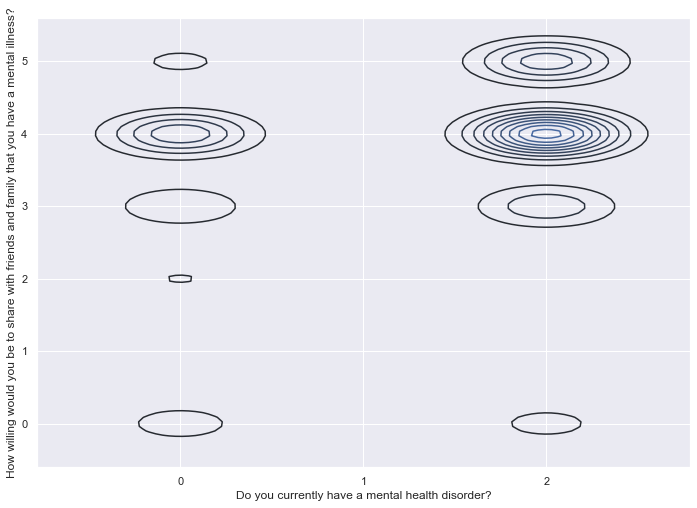

In [41]:
sns.kdeplot(
    family_temp['Do you currently have a mental health disorder?'],
    family_temp[
        'How willing would you be to share with friends and family that you have a mental illness?']
)
plt.xticks((0.0, 1.0, 2.0))
# plt.xticks(rotation = 45)
# sns.despine(offset=10, trim=True);

### Infer
- We can see that the people who are not particularly open with their families about their mental health have a higher bracket 

## Remote Work

In [54]:
data['Do you work remotely?']

0       Sometimes
1           Never
2          Always
3       Sometimes
4       Sometimes
          ...    
1428    Sometimes
1429    Sometimes
1430    Sometimes
1431    Sometimes
1432    Sometimes
Name: Do you work remotely?, Length: 1433, dtype: object

In [155]:
fig = px.histogram(data,
                   x="Do you currently have a mental health disorder?",
                   y="Do you work remotely?",
                   color="Do you work remotely?",
                   hover_data=data.columns)
fig.show()

In [156]:
plotly.io.write_html(fig, 'remo.html')

### Infer
- We can see that the people who generally work remotely have a higher bracket of mental disorders

## Comfortable discussing with coworkers

In [77]:
data[
    'Would you feel comfortable discussing a mental health disorder with your coworkers?']

0       Maybe
1       Maybe
2       Maybe
3           0
4       Maybe
        ...  
1428        0
1429        0
1430      Yes
1431    Maybe
1432    Maybe
Name: Would you feel comfortable discussing a mental health disorder with your coworkers?, Length: 1433, dtype: object

In [76]:
fig = px.bar(
    data,
    x="Do you currently have a mental health disorder?",
    y=
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    orientation='h',
    color="Do you currently have a mental health disorder?")
fig.show()

### Infer
- 1 - no, 2 - yes, 0 - maybe
- We can see that the people who cannot talk to their coworkers fall in a higher bracket of mental disorders

## Comfortable with employees

In [87]:
data[
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?']

0           Some of them
1           None of them
2           I don't know
3           Some of them
4           Some of them
              ...       
1428        I don't know
1429                   0
1430    Yes, all of them
1431    Yes, all of them
1432                   0
Name: Do you think that discussing a mental health disorder with previous employers would have negative consequences?, Length: 1433, dtype: object

In [157]:
fig = px.scatter(
    data,
    y="Do you currently have a mental health disorder?",
    x=
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
    color="Do you think that discussing a mental health disorder with previous employers would have negative consequences?")
fig.show()

In [158]:
plotly.io.write_html(fig, 'prevemp.html')

### Infer
- 1 - no, 2 - yes, 0 - maybe
- We can see that the people who could not discuss their health issues with previous employees are more prone to having a mental disorder

## Self employment

In [117]:
data['Are you self-employed?']

0       0
1       0
2       0
3       1
4       0
       ..
1428    1
1429    1
1430    0
1431    0
1432    0
Name: Are you self-employed?, Length: 1433, dtype: int64

In [159]:
fig = px.violin(data,
                x=data['Do you currently have a mental health disorder?'],
                y=data['Are you self-employed?'])
fig.show()

In [160]:
plotly.io.write_html(fig, 'selfe.html')

### Infer
- People who are self employed, have a higher probability of being content with their work and are less prone to mental disorder 

## Interference with work

In [128]:
data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?']

0       Not applicable to me
1                  Sometimes
2       Not applicable to me
3                  Sometimes
4                  Sometimes
                ...         
1428    Not applicable to me
1429                   Often
1430               Sometimes
1431                   Often
1432                   Often
Name: If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?, Length: 1433, dtype: object

In [161]:
fig = px.pie(data,
                values=data['Do you currently have a mental health disorder?'],
                names=data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'])
fig.show()

In [162]:
plotly.io.write_html(fig, 'inter.html')

### Infer
- We can say with more certainty that people with a mentla disorder cannot perform effectively and thus must be taken care of

In [149]:
import plotly.io

## Prediction

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
data2 = data.copy()

In [44]:
for a in cat_columns:
    data2[a] = data2[a].astype('category').cat.codes

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(['Do you currently have a mental health disorder?'], axis=1),
    data2['Do you currently have a mental health disorder?'],
    test_size=0.33,
    random_state=42)

In [46]:
clf = RandomForestClassifier()

In [47]:
clf.fit(X_train, y_train)

/home/subhaditya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
clf.score(X_test, y_test)

0.7040169133192389

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbr = GradientBoostingClassifier(verbose=1)
clf_gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         946.7923            0.65s
         2         879.8712            0.62s
         3         825.7045            0.59s
         4         780.8025            0.57s
         5         743.0245            0.56s
         6         710.8329            0.55s
         7         683.1043            0.54s
         8         660.0001            0.53s
         9         639.7854            0.52s
        10         622.0999            0.51s
        20         523.0065            0.44s
        30         462.8158            0.38s
        40         423.3161            0.32s
        50         387.2676            0.26s
        60         356.8037            0.21s
        70         330.5018            0.15s
        80         307.3401            0.10s
        90         286.5024            0.05s
       100         266.9434            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [50]:
clf_gbr.score(X_test, y_test)

0.7399577167019028

In [51]:
from sklearn.tree import DecisionTreeClassifier

clf_gbr = DecisionTreeClassifier()
clf_gbr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
clf_gbr.score(X_test, y_test)

0.6342494714587738

In [53]:
from sklearn.ensemble import AdaBoostClassifier

clf_rf = AdaBoostClassifier()
clf_rf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [54]:
clf_rf.score(X_test, y_test)

0.7251585623678647